In [2]:
!pip install wordcloud



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn


  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 466.9 kB/s eta 0:00:22
   - -------------------------------------- 0.5/10.7 MB 466.9 kB/s eta 0:00:22
   -- ------------------------------------- 0.8/10.7 MB 546.7 kB/s eta 0:00:19
   --- ------------------------------------ 1.0/10.7 MB 596.1 kB/s eta 0:00:17
   --- ------------------------------------ 1.0/10.7 MB 596.1 kB/s eta 0:00:17
   ---- ----------------------------------- 1.3/10.7 MB 631.8 kB/s eta 0:00:15
   ---- ---------------------


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
df = pd.read_csv(r"D:\Backup\Downloads\archive (7)\hotel_reviews.csv")


In [13]:
# See what the data looks like
print(df.head())           # Show the first 5 rows

# See the actual column names
print(df.columns.tolist()) # Show column names as a list


                                      Review  Rating
0                 Best budget friendly hotel     9.0
1                              Amazing place     9.0
2               Overall good stay. Economic.     9.0
3                                     Lovely     9.0
4  Great hotel Great staff and great staying     9.0
['Review', 'Rating']


In [14]:
df = df[['Review', 'Rating']]


In [18]:
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x >= 7 else 'negative')


In [19]:
import re
import string

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df['Cleaned_Review'] = df['Review'].apply(clean_text)


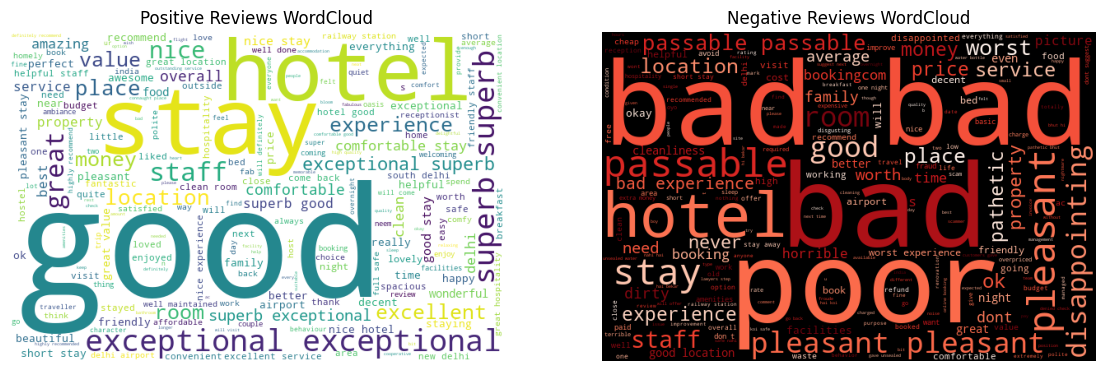

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['Sentiment'] == 'positive']['Cleaned_Review'])
negative_text = " ".join(df[df['Sentiment'] == 'negative']['Cleaned_Review'])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(positive_text))
plt.title("Positive Reviews WordCloud")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(negative_text))
plt.title("Negative Reviews WordCloud")
plt.axis('off')
plt.show()


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['Cleaned_Review']
y = df['Sentiment']

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vec = vectorizer.fit_transform(X)


Accuracy: 0.9243397573162027

Classification Report:
               precision    recall  f1-score   support

    negative       0.93      0.81      0.87       425
    positive       0.92      0.97      0.95       976

    accuracy                           0.92      1401
   macro avg       0.93      0.89      0.91      1401
weighted avg       0.92      0.92      0.92      1401



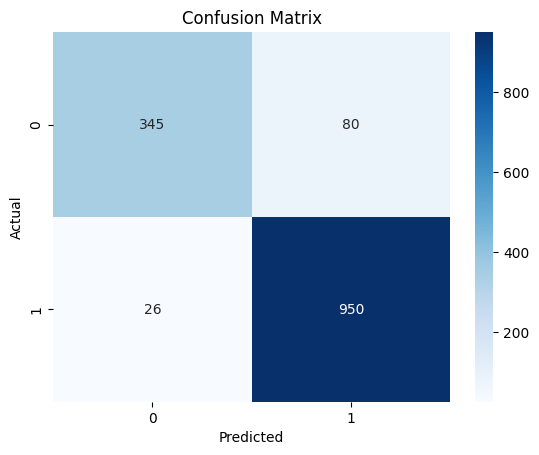

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
